In [17]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image 

2023-12-09 11:31:47.218310: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 11:31:47.218352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 11:31:47.219673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 11:31:47.230079: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 11:31:48.398160: W tensorflow/compiler/tf2

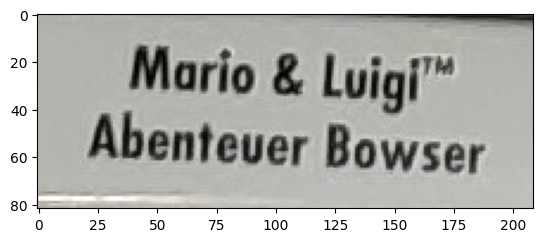

In [20]:
img = image.load_img("images/test2.jpg") 
plt.imshow(img)

     

In [21]:
text = pytesseract.image_to_string(img)
print(text)

 

Mario & Luigi”
Abenteuer Bowser



In [26]:
# Let's set an initial value of 120;
# from my experience it's a reasonable threshold@interact(threshold=120)
def binarize(threshold):
    #img_copy = text_img.copy()    # convert to grayscale
    img_copy = img_copy.convert("L")    # perform the binarization through a simple lambda
    img_copy = img_copy.point(lambda x: 255 if x > threshold else 0,
                              mode="1"
                              )
    display(img_copy)

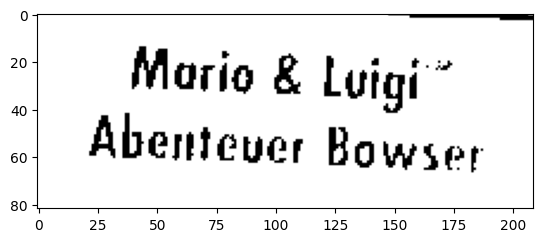

In [90]:
binarized_img = img.convert("L").point(lambda x: 255 if x > 70 else 0, mode="1")
plt.imshow(binarized_img)


In [91]:
text = pytesseract.image_to_string(binarized_img)
print(text)

Mario & Luigi
Abenteuer Bowser



In [ ]:
import cv2
import pytesseract
import urllib
import numpy as np
import re

# Installs: https://www.learnopencv.com/deep-learning-based-text-recognition-ocr-using-tesseract-and-opencv/


     
  # Uncomment the line below to provide path to tesseract manually
  # pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
 
 
  # Read image from URL
  #   Taken from https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah
  # https://i.ibb.co/4mm9WvZ/book-rot.jpg
  # https://i.ibb.co/M7jwWR2/book.jpg
  # https://i.ibb.co/27bKNJ8/book-rot2.jpg
  resp = urllib.request.urlopen('https://i.ibb.co/27bKNJ8/book-rot2.jpg')
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR) # Initially decode as color
  
  #  TAKEN FROM: https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/
  # convert the image to grayscale and flip the foreground
  # and background to ensure foreground is now "white" and
  # the background is "black"
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.bitwise_not(gray)
 
  rot_data = pytesseract.image_to_osd(image);
  print("[OSD] "+rot_data)
  rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

  angle = float(rot)
  if angle > 0:
    angle = 360 - angle
  print("[ANGLE] "+str(angle))
    
  # rotate the image to deskew it
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)	
	
  #  TODO: Rotated image can be saved here
  print(pytesseract.image_to_osd(rotated));
  print("[TEXT]")
  # Run tesseract OCR on image
  text = pytesseract.image_to_string(rotated, lang='eng', config="-psm 1")

  # Print recognized text
  print(text.encode(encoding='UTF-8'))
                